### Poland Presidential Elections 2020 - turnout difference between 1st and 2nd round

It seems that the turnout was higher in the 2nd round. I thought it would be interesting to see where did it change the most between the rounds. 

### Importing necessary packages

In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

### Loading the data

In [2]:
df1 = pandas.read_csv("..\\data\\1st round\\wyniki_gl_na_kand_po_powiatach_proc_utf8.csv", delimiter=";", decimal=",")
df2 = pandas.read_csv("../data//2nd round/2wyniki_gl_na_kand_po_powiatach_proc_utf8.csv", delimiter=";", decimal=",")

In [3]:
df1.head()

,Nr OKW,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,% głosów ważnych,...,Andrzej Sebastian DUDA,Szymon Franciszek HOŁOWNIA,Marek JAKUBIAK,Władysław Marcin KOSINIAK-KAMYSZ,Mirosław Mariusz PIOTROWSKI,Paweł Jan TANAJNO,Rafał Kazimierz TRZASKOWSKI,Waldemar Włodzimierz WITKOWSKI,Stanisław Józef ŻÓŁTEK,Liczba obwodów
0,2,20100,bolesławiecki,dolnośląskie,60.09,0.39,36.48,63.52,0.0,99.61,...,41.56,16.39,0.13,1.54,0.07,0.12,31.03,0.13,0.24,63
1,4,20200,dzierżoniowski,dolnośląskie,58.95,0.34,35.22,64.78,0.0,99.66,...,44.03,13.67,0.12,1.48,0.10,0.18,31.87,0.10,0.19,83
2,3,20300,głogowski,dolnośląskie,62.57,0.29,30.65,69.35,0.0,99.71,...,44.19,14.21,0.10,1.75,0.10,0.14,30.94,0.10,0.20,53
3,1,20400,górowski,dolnośląskie,54.05,0.27,27.50,72.50,0.0,99.73,...,50.04,13.14,0.14,2.59,0.08,0.10,25.49,0.07,0.15,23
4,2,20500,jaworski,dolnośląskie,58.95,0.39,38.04,61.96,0.0,99.61,...,47.78,11.18,0.12,3.08,0.12,0.09,28.77,0.06,0.19,39


In [4]:
df2.head()

,Nr OKW,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok skreślonego nazwiska kandydata,% głosów ważnych,Andrzej Sebastian DUDA,Rafał Kazimierz TRZASKOWSKI,Liczba obwodów
0,2,20100,bolesławiecki,dolnośląskie,62.79,0.76,55.59,44.41,NaN,99.24,49.63,50.37,63
1,4,20200,dzierżoniowski,dolnośląskie,62.64,0.85,56.90,43.10,NaN,99.15,50.44,49.56,83
2,3,20300,głogowski,dolnośląskie,66.71,0.82,63.64,36.36,NaN,99.18,51.78,48.22,53
3,1,20400,górowski,dolnośląskie,59.29,0.87,49.28,50.72,NaN,99.13,57.00,43.00,23
4,2,20500,jaworski,dolnośląskie,62.72,0.97,56.25,43.75,NaN,99.03,54.44,45.56,39


Keeping only the relevant columns.

In [5]:
df1 = df1[['Kod TERYT','Powiat','Województwo','Frekwencja']]
df2 = df2[['Kod TERYT','Powiat','Województwo','Frekwencja']]

In [6]:
df1.head()

,Kod TERYT,Powiat,Województwo,Frekwencja
0,20100,bolesławiecki,dolnośląskie,60.09
1,20200,dzierżoniowski,dolnośląskie,58.95
2,20300,głogowski,dolnośląskie,62.57
3,20400,górowski,dolnośląskie,54.05
4,20500,jaworski,dolnośląskie,58.95


In [7]:
df2.head()

,Kod TERYT,Powiat,Województwo,Frekwencja
0,20100,bolesławiecki,dolnośląskie,62.79
1,20200,dzierżoniowski,dolnośląskie,62.64
2,20300,głogowski,dolnośląskie,66.71
3,20400,górowski,dolnośląskie,59.29
4,20500,jaworski,dolnośląskie,62.72


Calculating the turnout difference.

In [8]:
df1['Frekwencja2'] = df2['Frekwencja']
df1['Fr2-Fr1'] = df1['Frekwencja2'] - df1['Frekwencja']
df1.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,Frekwencja2,Fr2-Fr1
0,20100,bolesławiecki,dolnośląskie,60.09,62.79,2.70
1,20200,dzierżoniowski,dolnośląskie,58.95,62.64,3.69
2,20300,głogowski,dolnośląskie,62.57,66.71,4.14
3,20400,górowski,dolnośląskie,54.05,59.29,5.24
4,20500,jaworski,dolnośląskie,58.95,62.72,3.77


### Loading the geodata

In [9]:
powiat_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Powiaty\\Powiaty.shp", encoding="utf-8")
woj_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Wojewodztwa\\Województwa.shp", encoding="utf-8")

Joining geodata with dataframe.

In [10]:
powiat_df["JPT_KOD_JE"] = (powiat_df["JPT_KOD_JE"] + "00").astype(int)
powiat_df.loc[powiat_df.JPT_NAZWA_ == "powiat Warszawa", "JPT_KOD_JE"] = 146501
merged_df = powiat_df.set_index("JPT_KOD_JE").join(df1.set_index("Kod TERYT"))
merged_df.head()

,JPT_SJR_KO,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,...,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry,Powiat,Województwo,Frekwencja,Frekwencja2,Fr2-Fr1
JPT_KOD_JE,,,,,,,,,,,,,,,,,,,,,
181500,POW,powiat ropczycko-sędziszowski,NaN,13415,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,829084,NaN,1.776163,0.068825,"POLYGON ((21.69429 50.17849, 21.69440 50.17849...",ropczycko-sędziszowski,podkarpackie,67.03,69.80,2.77
141000,POW,powiat łosicki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,829095,NaN,2.220227,0.101595,"POLYGON ((22.72381 52.28039, 22.72379 52.28043...",łosicki,mazowieckie,61.62,66.60,4.98
141800,POW,powiat piaseczyński,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,829103,NaN,1.947858,0.081285,"POLYGON ((21.11010 52.11317, 21.10875 52.11459...",piaseczyński,mazowieckie,74.03,77.38,3.35
142500,POW,powiat radomski,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,829110,NaN,4.427170,0.197463,"POLYGON ((20.98915 51.48947, 20.98919 51.48942...",radomski,mazowieckie,64.38,69.67,5.29
142700,POW,powiat sierpecki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,829112,NaN,2.138918,0.113594,"POLYGON ((19.50876 52.86784, 19.50873 52.86795...",sierpecki,mazowieckie,58.84,64.18,5.34


In [11]:
display(HTML(df1.nlargest(3, "Fr2-Fr1").to_html(columns=['Województwo', 'Powiat', 'Frekwencja', 'Frekwencja2', 'Fr2-Fr1'], index=False)))

Województwo,Powiat,Frekwencja,Frekwencja2,Fr2-Fr1
warmińsko-mazurskie,giżycki,57.91,66.74,8.83
podlaskie,sejneński,52.12,60.70,8.58
zachodniopomorskie,sławieński,60.19,68.65,8.46


In [12]:
display(HTML(df1.nsmallest(3, "Fr2-Fr1").to_html(columns=['Województwo', 'Powiat', 'Frekwencja', 'Frekwencja2', 'Fr2-Fr1'], index=False)))

Województwo,Powiat,Frekwencja,Frekwencja2,Fr2-Fr1
mazowieckie,zagranica,83.18,79.67,-3.51
mazowieckie,pruszkowski,75.15,76.12,0.97
podkarpackie,Rzeszów,68.74,69.94,1.20


Pretty interesting! The voting from abroad was the only one to decrease in the 2nd round.

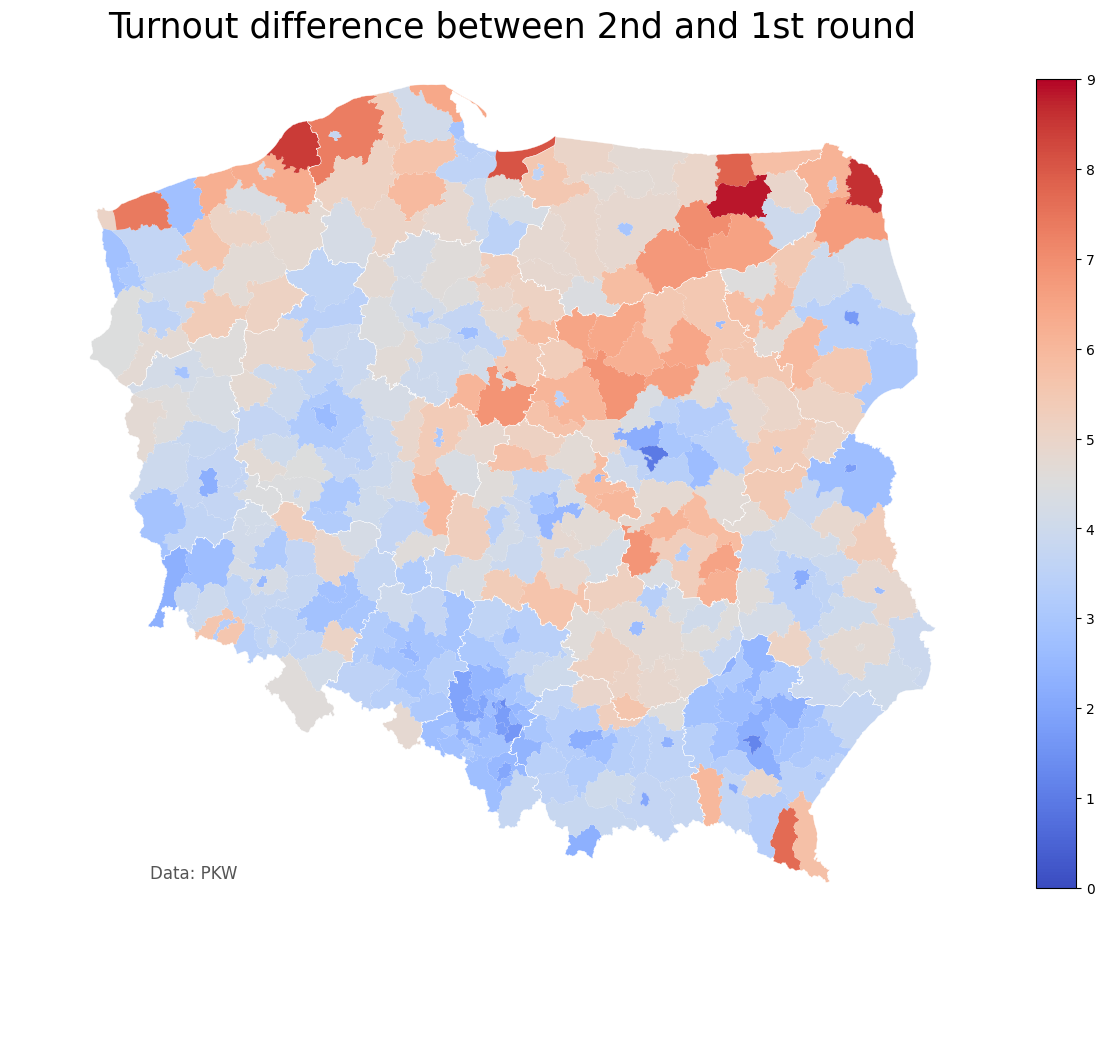

In [14]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Turnout difference between 2nd and 1st round", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=9))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Fr2-Fr1", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=9);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Turnout difference", dpi=200, bbox_inches='tight')

It appears that central and northern parts of the country observed the most significant increase in turnout, while the turnout in major cities and the south was particularly stagnant between the two rounds.